# IMPORTING SOME IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import os
import numpy as np
print(os.getcwd())
import requests
from bs4 import BeautifulSoup
import csv
from requests import get
from io import BytesIO
from zipfile import ZipFile
import glob
import shutil
import fnmatch


C:\Users\ayush\OneDrive\Documents\GitHub\Final_project


In [2]:
data_folder = "C:\\Users\\ayush\\OneDrive\\Documents\\GitHub\\Final_project\\input_files"

# GETTING FILES FROM WEB SERVER AND UNZIPPING THEM

In [ ]:
csv1_beneficiary_2008_data =get('https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip')
csv2_claims_data_2008_2010 = get('http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1A.zip')
csv3_claims_data2_2008_2010 =get('http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1B.zip')
csv4_inpatient_claims_2008_2010= get('https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip')
csv5_outpatient_claims_2008_2010 = get('https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.zip')
csv6_prescription_2008_2010 = get('http://downloads.cms.gov/files/DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.zip')
csv7_beneficiary_2009_data = get('https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_1.zip')
csv8_beneficiary_2010_data = get ('https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2010_Beneficiary_Summary_File_Sample_1.zip')

def file_extract_from_web(web_object):
    zip_file = ZipFile(BytesIO(web_object.content))
    zip_file.extractall()


file_extract_from_web(csv1_beneficiary_2008_data)        
file_extract_from_web(csv2_claims_data_2008_2010) 
file_extract_from_web(csv3_claims_data2_2008_2010) 
file_extract_from_web(csv4_inpatient_claims_2008_2010) 
file_extract_from_web(csv5_outpatient_claims_2008_2010) 
file_extract_from_web(csv6_prescription_2008_2010) 
file_extract_from_web(csv7_beneficiary_2009_data) 
file_extract_from_web(csv8_beneficiary_2010_data)


# CHECKING, IMPORTING AND RENAMING FILES ACCORDINGLY

In [3]:
os.listdir(data_folder)

['.ipynb_checkpoints',
 'DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv',
 'DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv',
 'DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv',
 'DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.csv',
 'DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv',
 'DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv']

In [ ]:
## Copying data files into folder
for root, dirnames, filenames in os.walk(os.getcwd()):
    for filename in fnmatch.filter(filenames, '*.csv'):
        shutil.copy(os.path.join(root, filename),data_folder)

In [4]:
files = os.listdir(data_folder)
beneficiary_summary_2008 = pd.read_csv(data_folder+'\\'+ files[1])
beneficiary_summary_2009 = pd.read_csv(data_folder+'\\'+ files[5])
beneficiary_summary_2010 = pd.read_csv(data_folder+'\\'+ files[6])
drug_2008_2010 = pd.read_csv(data_folder+'\\'+ files[4])
outpatient_claims = pd.read_csv(data_folder+'\\'+ files[3])
inpatient_claims = pd.read_csv(data_folder+'\\'+ files[2])
# carrier_claims = pd.read_csv(data_folder+'\\'+ files[3])
# carrier_claims2 = pd.read_csv(data_folder+'\\'+ files[2])

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
beneficiary_summary_2008['year'] = '2008'
beneficiary_summary_2009['year'] = '2009'
beneficiary_summary_2010['year'] = '2010'

beneficiary_merged = pd.concat([beneficiary_summary_2008,beneficiary_summary_2009,beneficiary_summary_2010],axis=0)
beneficiary_merged.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,year
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,2008
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,2008
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,2008


# EDA - EXPLORATORY DATA ANALYSIS

#### CHANGING DATE COLUMNS

In [7]:
beneficiary_merged['BENE_BIRTH_DT'] = pd.to_datetime(beneficiary_merged['BENE_BIRTH_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
drug_2008_2010['SRVC_DT'] = pd.to_datetime(drug_2008_2010['SRVC_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
outpatient_claims['CLM_FROM_DT'] = pd.to_datetime(outpatient_claims['CLM_FROM_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
outpatient_claims['CLM_THRU_DT'] = pd.to_datetime(outpatient_claims['CLM_THRU_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
inpatient_claims['CLM_FROM_DT'] = pd.to_datetime(inpatient_claims['CLM_FROM_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
inpatient_claims['CLM_THRU_DT'] = pd.to_datetime(inpatient_claims['CLM_THRU_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
inpatient_claims['NCH_BENE_DSCHRG_DT'] = pd.to_datetime(inpatient_claims['NCH_BENE_DSCHRG_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")
inpatient_claims['CLM_ADMSN_DT'] = pd.to_datetime(inpatient_claims['CLM_ADMSN_DT'], format='%Y%m%d').dt.strftime("%Y-%m-%d")


In [8]:
### CREATING YEAR COLUMNS FOR SEPERATING FILES YEAR WISE LATER
inpatient_claims['year'] = inpatient_claims['CLM_FROM_DT'].astype(str).str[0:4]
outpatient_claims['year'] = outpatient_claims['CLM_FROM_DT'].astype(str).str[0:4]
drug_2008_2010['year'] = drug_2008_2010['SRVC_DT'].astype(str).str[0:4]
drug_2008_2010.head()

,DESYNPUF_ID,PDE_ID,SRVC_DT,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT,year
0,00013D2EFD8E45D1,233664490397622,2008-01-03,247037252,30.0,20,10.0,120.0,2008
1,00013D2EFD8E45D1,233644490171972,2008-01-05,223039502,10.0,10,0.0,0.0,2008
2,00013D2EFD8E45D1,233974489116848,2008-01-09,364724812,120.0,30,10.0,110.0,2008
3,00013D2EFD8E45D1,233574491083209,2008-01-23,179180672,30.0,30,0.0,240.0,2008
4,00013D2EFD8E45D1,233024491180571,2008-01-24,58016005300,30.0,30,70.0,70.0,2008


In [9]:
beneficiary_merged.describe(include='all')

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,year
count,343644,343644,5.461000e+03,343644.000000,343644.000000,343644,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.000000,343644.00000,343644.000000,343644.000000,343644.000000,343644
unique,116352,900,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,8EAC1159E43216B3,1942-10-01,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
freq,3,1556,NaN,NaN,NaN,316510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116352
mean,NaN,NaN,2.009074e+07,1.553069,1.285065,NaN,25.696715,366.471174,11.187328,10.840853,3.159421,8.527427,1.803567,1.703903,1.831154,1.934572,1.872621,1.787667,1.636988,1.575991,1.834783,1.857929,1.958667,1887.001839,214.821391,77.305875,609.038278,187.671253,23.29949,1117.489495,314.954662,17.506926,NaN
std,NaN,NaN,8.214954e+03,0.497176,0.755564,NaN,15.584441,266.006973,2.886072,3.411733,5.189713,5.192147,0.397300,0.456535,0.374617,0.247280,0.333397,0.408960,0.480869,0.494192,0.371377,0.349124,0.199061,7145.654610,763.951228,1627.037876,1677.366102,483.310402,355.45608,1413.605670,392.768183,85.620195,NaN
min,NaN,NaN,2.008010e+07,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-3000.000000,0.000000,0.000000,-100.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,2.008100e+07,1.000000,1.000000,NaN,10.000000,141.000000,12.000000,12.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.000000,0.000000,0.000000,NaN
50%,NaN,NaN,2.009070e+07,2.000000,1.000000,NaN,25.000000,330.000000,12.000000,12.000000,0.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000,670.000000,190.000000,0.000000,NaN
75%,NaN,NaN,2.010040e+07,2.000000,1.000000,NaN,39.000000,560.000000,12.000000,12.000000,10.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,550.000000,170.000000,0.00000,1630.000000,470.000000,0.000000,NaN


In [10]:
drug_2008_2010.describe(include='all')

,DESYNPUF_ID,PDE_ID,SRVC_DT,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT,year
count,5552421,5.552421e+06,5552421,5552421.0,5.552421e+06,5.552421e+06,5.552421e+06,5.552421e+06,5552421
unique,99538,NaN,1096,507625.0,NaN,NaN,NaN,NaN,3
top,56496515E2C1AD0B,NaN,2009-01-31,2840001.0,NaN,NaN,NaN,NaN,2009
freq,256,NaN,6212,165.0,NaN,NaN,NaN,NaN,2165456
mean,NaN,2.335045e+14,NaN,NaN,5.111604e+01,3.418116e+01,1.030880e+01,6.140442e+01,NaN
std,NaN,2.857934e+11,NaN,NaN,5.174329e+01,2.124316e+01,2.412327e+01,9.430161e+01,NaN
min,NaN,2.330145e+14,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,NaN,2.332545e+14,NaN,NaN,3.000000e+01,3.000000e+01,0.000000e+00,1.000000e+01,NaN
50%,NaN,2.335045e+14,NaN,NaN,3.000000e+01,3.000000e+01,0.000000e+00,2.000000e+01,NaN
75%,NaN,2.337545e+14,NaN,NaN,6.000000e+01,3.000000e+01,1.000000e+01,8.000000e+01,NaN


In [11]:
outpatient_claims.describe(include ='all')

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,ADMTNG_ICD9_DGNS_CD,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45,year
count,790790,7.907900e+05,790790.000000,790790,790790,790790,790790.000000,790790.000000,7.730000e+05,1.344330e+05,2.576660e+05,790790.000000,785170,492433,310937,191642,112150,72876,49146,34142,23675,1625,200.000000,123.0,73.0,48.0,35.0,29,790790.000000,790790.000000,194486,646260,451369,331508,273257,226269,190088,160249,137593,119791,105504,93609,83909,75011,67864,61748,56297,51470,47291,43684,40353,37472,35049,32971,31118,29291,27810,26542,25127,23934,22767,21499,20375,19366,18377,17516,16748,15940,15126,14399,13492,12668,11876,11196,10556,0.0,790790
unique,85272,NaN,NaN,1117,1097,6294,NaN,NaN,NaN,NaN,NaN,NaN,11133,5619,5014,4460,3927,3402,3036,2669,2332,644,NaN,92.0,58.0,42.0,34.0,29,NaN,NaN,4428,2533,3405,3305,3192,3044,2888,2799,2613,2551,2449,2347,2260,2145,2054,1986,1871,1789,1734,1656,1565,1464,1431,1374,1361,1214,1195,1156,1111,1072,1020,981,941,888,841,823,817,757,757,733,675,658,666,623,588,NaN,5
top,AD5D4E087BF57C05,NaN,NaN,NaT,NaT,0502NA,NaN,NaN,NaN,NaN,NaN,NaN,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019,NaN,25000.0,2724.0,4019.0,7802.0,V0481,NaN,NaN,V7612,36415,85025,85025,85025,85025,85025,85025,97110,97110,97110,97110,97110,97110,97110,97110,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,Q4081,NaN,2009
freq,78,NaN,NaN,11253,11253,9906,NaN,NaN,NaN,NaN,NaN,NaN,19079,30464,18622,10745,6162,3800,2491,1526,973,69,NaN,7.0,5.0,3.0,2.0,1,NaN,NaN,8209,161373,23068,18142,15057,12182,9543,7838,6408,5876,5475,5014,4747,4316,4031,3658,3502,3341,3393,3365,3224,3283,3269,3134,3184,3165,3088,3000,2963,2983,2818,2800,2671,2707,2515,2499,2431,2322,2300,2087,2018,1898,1780,1681,1578,NaN,322358
mean,NaN,5.425026e+14,1.014230,NaN,NaN,NaN,283.924569,10.239760,4.975733e+09,4.947815e+09,4.904993e+09,0.012898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5535.690000,NaN,NaN,NaN,NaN,NaN,2.825466,83.845876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.858482e+11,0.118438,NaN,NaN,NaN,571.392794,234.668372,2.874373e+09,2.890483e+09,2.889353e+09,2.315506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3164.871486,NaN,NaN,NaN,NaN,NaN,15.596522,178.759708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,5.420123e+14,1.000000,NaN,NaN,NaN,-100.000000,0.000000,1.024080e+05,3.258650e+05,1.024080e+05,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.422523e+14,1.000000,NaN,NaN,NaN,40.000000,0.000000

In [13]:
inpatient_claims.describe(include ='all')

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,NCH_BENE_DSCHRG_DT,CLM_DRG_CD,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45,year
count,66773,6.677300e+04,66773.000000,66773,66773,66773,66773.000000,66773.000000,6.610000e+04,3.905800e+04,7.683000e+03,66773,66174,66773.000000,64595.000000,66773.000000,66773.000000,66705.000000,66773,66773,66678,66247,65492,64005,61639,58369,54407,49947,45032,5455,38231.000000,22733,14462,9377,6446,4622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66773
unique,37780,NaN,NaN,1121,1097,2675,NaN,NaN,NaN,NaN,NaN,1120,2285,NaN,NaN,NaN,NaN,NaN,1096,739,2740,2961,2909,2907,2915,2843,2823,2696,2571,1134,NaN,1992,1680,1370,1125,927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,CD57573A5B77AAFE,NaN,NaN,2008-05-22,2008-06-02,23006G,NaN,NaN,NaN,NaN,NaN,2008-05-22,78605,NaN,NaN,NaN,NaN,NaN,2008-05-29,882,486,4019,4019,4019,4019,4019,4019,4019,4019,4019,NaN,4019,4019,4019,4019,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
freq,14,NaN,NaN,115,108,772,NaN,NaN,NaN,NaN,NaN,115,2739,NaN,NaN,NaN,NaN,NaN,108,282,2453,4170,3830,3469,3126,2687,2329,1943,1649,170,NaN,1463,810,467,308,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27678
mean,NaN,1.965017e+14,1.001018,NaN,NaN,NaN,9573.632756,398.899256,5.046059e+09,5.065150e+09,5.062263e+09,NaN,NaN,28.979228,1057.058844,90.028904,1.590313,5.582895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5901.022129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.859526e+11,0.031896,NaN,NaN,NaN,9315.073232,3663.463023,2.931521e+09,2.930776e+09,2.906374e+09,NaN,NaN,75.606458,29.650916,1033.615068,40.163847,6.284463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3035.861005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.960112e+14,1.000000,NaN,NaN,NaN,-8000.000000,0.000000,1.168381e+06,1.159725e+06,8.363090e+05,NaN,NaN,0.000000,1024.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.962512e+14,

### CREATING SEPERATE YEAR WISE FILES

In [14]:
inpatient_claims_2008 = inpatient_claims.loc[inpatient_claims['year'] == '2008']
inpatient_claims_2009 = inpatient_claims.loc[inpatient_claims['year'] == '2009']
inpatient_claims_2010 = inpatient_claims.loc[inpatient_claims['year'] == '2010']
outpatient_claims_2008 = outpatient_claims.loc[outpatient_claims['year'] == '2008']
outpatient_claims_2009 = outpatient_claims.loc[outpatient_claims['year'] == '2009']
outpatient_claims_2010 = outpatient_claims.loc[outpatient_claims['year'] == '2010']
drugs_2008 = drug_2008_2010.loc[drug_2008_2010['year'] == '2008']
drugs_2009 = drug_2008_2010.loc[drug_2008_2010['year'] == '2009']
drugs_2010 = drug_2008_2010.loc[drug_2008_2010['year'] == '2010']
drugs_2010.head()

,DESYNPUF_ID,PDE_ID,SRVC_DT,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT,year
141,00013D2EFD8E45D1,233234488794419,2010-01-03,55289065110,60.0,10,0.0,40.0,2010
142,00013D2EFD8E45D1,233914491435764,2010-01-09,74169302,360.0,30,10.0,40.0,2010
143,00013D2EFD8E45D1,233154491922007,2010-01-15,52959027128,60.0,30,10.0,30.0,2010
144,00013D2EFD8E45D1,233314489399267,2010-01-16,55887073060,30.0,30,0.0,10.0,2010
145,00013D2EFD8E45D1,233244494138221,2010-01-23,904592461,30.0,30,0.0,570.0,2010


In [15]:
#### USED FOR CREATING INDEXED REMOVAL OF COLUMNS
from itertools import chain
index_list = []
concatenated = chain(range(3,5), range(12,28), range(30,76))
for i in concatenated:
    index_list.append(i)
print(index_list)

[3, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [16]:
## CREATING A LIST OF IMPORTANT VARIABLES AND DROPPING REST
outpatient_claims_2008_final = outpatient_claims_2008.drop(outpatient_claims_2008.columns[index_list],axis = 'columns')
outpatient_claims_2009_final = outpatient_claims_2009.drop(outpatient_claims_2009.columns[index_list],axis = 'columns')


In [17]:
outpatient_claims_2009_final.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,year
1,00016F745862898F,542272281166593,1,3901GS,30.0,0.0,2.963420e+09,NaN,2.963420e+09,0.0,0.0,0.0,2009
2,00016F745862898F,542282281644416,1,3939PG,30.0,0.0,5.737808e+09,NaN,5.737808e+09,0.0,0.0,70.0,2009
3,0001FDD721E223DC,542642281250669,1,3902NU,30.0,0.0,1.233848e+09,NaN,NaN,0.0,0.0,50.0,2009
5,00024B3D2352D2D0,542442280980633,1,5213ZG,80.0,0.0,4.199632e+09,NaN,NaN,0.0,0.0,30.0,2009
6,00024B3D2352D2D0,542422281208985,1,5213RM,10.0,0.0,1.449019e+09,NaN,NaN,0.0,0.0,10.0,2009


In [18]:
#### USED FOR CREATING INDEXED REMOVAL OF COLUMNS
from itertools import chain
index_list = []
concatenated = chain(range(3,5), range(11,14), range(18,81))
for i in concatenated:
    index_list.append(i)
print(index_list)

[3, 4, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [19]:
inpatient_claims_2008 = inpatient_claims_2008.drop(inpatient_claims_2008.columns[index_list],axis = 'columns')
inpatient_claims_2009 = inpatient_claims_2009.drop(inpatient_claims_2009.columns[index_list],axis = 'columns')

In [20]:
inpatient_claims_2009.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,year
1,00016F745862898F,196201177000368,1,3900MB,26000.0,0.0,6.476809e+09,NaN,NaN,1068.0,0.0,0.0,6.0,2009
2,00016F745862898F,196661177015632,1,3900HM,5000.0,0.0,6.119985e+08,611998537.0,NaN,1068.0,0.0,0.0,2.0,2009
3,00016F745862898F,196091176981058,1,3913XU,5000.0,0.0,4.971603e+09,NaN,1.119000e+09,1068.0,0.0,0.0,3.0,2009
10,000B97BA2314E971,196231176958277,1,2200GD,2000.0,0.0,3.115083e+09,NaN,NaN,1068.0,0.0,0.0,4.0,2009
12,00108066CA1FACCE,196501176978540,1,0300CC,30000.0,0.0,1.521517e+09,NaN,NaN,1068.0,0.0,0.0,7.0,2009


In [21]:
drugs_2009 = drugs_2009.drop(['SRVC_DT','PDE_ID'], axis = 'columns')
drugs_2008 = drugs_2008.drop(['SRVC_DT','PDE_ID'], axis = 'columns')
drugs_2008.head()

,DESYNPUF_ID,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT,year
0,00013D2EFD8E45D1,247037252,30.0,20,10.0,120.0,2008
1,00013D2EFD8E45D1,223039502,10.0,10,0.0,0.0,2008
2,00013D2EFD8E45D1,364724812,120.0,30,10.0,110.0,2008
3,00013D2EFD8E45D1,179180672,30.0,30,0.0,240.0,2008
4,00013D2EFD8E45D1,58016005300,30.0,30,70.0,70.0,2008


### MISSING VALUE TREATMEMT

In [22]:
# Checking nan's in ID column
print(sum(outpatient_claims['DESYNPUF_ID'].isnull()))
print(sum(inpatient_claims['DESYNPUF_ID'].isnull()))
print(sum(drug_2008_2010['DESYNPUF_ID'].isnull()))
print(sum(beneficiary_merged['DESYNPUF_ID'].isnull()))

## None of the data sets have missing id values

0
0
0
0


In [23]:
# Since the data is sufficient - we remove all rows directly which have missing values
inpatient_claims_2008= inpatient_claims_2008.dropna(subset= ['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT'])
outpatient_claims_2008= outpatient_claims_2008.dropna(subset= ['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT'])
inpatient_claims_2009= inpatient_claims_2009.dropna(subset= ['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT'])
outpatient_claims_2009= outpatient_claims_2009.dropna(subset= ['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT'])


In [24]:
beneficiary_summary_2008 = beneficiary_summary_2008.fillna(0)
inpatient_claims_2008 = inpatient_claims_2008.fillna(0)
outpatient_claims_2008 = outpatient_claims_2009.fillna(0)
inpatient_claims_2008 = inpatient_claims_2008.fillna(0)
outpatient_claims_2008 = outpatient_claims_2009.fillna(0)
drugs_2008 = drugs_2008.fillna(0)
drugs_2009 = drugs_2009.fillna(0)
beneficiary_summary_2009 = beneficiary_summary_2009.fillna(0)

# GROUPING THE COLUMNS(in resp df's)FOR VARIABLES GIVEN BELOW

In [25]:
###Variables
## Outpatient claims - count of distinct claim ids
##                   - count of distinct segment
##                   - count of distinct providers
##                   - total claim payment amount
##                   - average claim amount 
##                   - avg of nch_prmry_pyr_clm_pd_amt/ clm_pmt_amt***
##                   - count of distinct(AT_PHYSN_NPI)
##                   - count of distinct(OP_PHYSN_NPI)
##                   - count of distinct(OT_PHYSN_NPI)
##                   - sum of NCH_BENE_PTB_COINSRNC_AMT ***
##                   - sum of NCH_BENE_PTB_DDCTBL_AMT ***
## Inpatient claims  - sum of (NCH_BENE_DSCHRG_DT - CLM_ADMSN_DT)
## Drugs             - count of distinct PROD_SRVC_ID
##                   - Sum of QTY_DSPNSD_NUM
##                   - average of DAYS_SUPLY_NUM
##                   - sum of TOT_RX_CST_AMT


#### INPATIENT DATA GROUPING /RENAMING

In [26]:
inpatient_claims_2008_grouped= inpatient_claims_2008.groupby("DESYNPUF_ID",as_index = False).agg({"CLM_ID": pd.Series.nunique,"SEGMENT": pd.Series.nunique,"PRVDR_NUM": pd.Series.nunique,"CLM_PMT_AMT": np.sum,"AT_PHYSN_NPI": pd.Series.nunique,"OP_PHYSN_NPI": pd.Series.nunique,"OT_PHYSN_NPI": pd.Series.nunique,"CLM_UTLZTN_DAY_CNT":np.sum })
inpatient_claims_2008_grouped.columns = ['DESYNPUF_ID','DISTINCT_CLAIMS','DIS_SEGMENT','DIS_PROVIDERS','TOT_CLAIM_AMT','DIS_AT_PHY','DIS_OP_PHY','DIS_OT_PHY','TOT_INPATIENT_DAYS']
inpatient_claims_2009_grouped= inpatient_claims_2009.groupby("DESYNPUF_ID",as_index = False).agg({"CLM_ID": pd.Series.nunique,"SEGMENT": pd.Series.nunique,"PRVDR_NUM": pd.Series.nunique,"CLM_PMT_AMT": np.sum,"AT_PHYSN_NPI": pd.Series.nunique,"OP_PHYSN_NPI": pd.Series.nunique,"OT_PHYSN_NPI": pd.Series.nunique,"CLM_UTLZTN_DAY_CNT":np.sum })
inpatient_claims_2009_grouped.columns = ['DESYNPUF_ID','DISTINCT_CLAIMS','DIS_SEGMENT','DIS_PROVIDERS','TOT_CLAIM_AMT','DIS_AT_PHY','DIS_OP_PHY','DIS_OT_PHY','TOT_INPATIENT_DAYS']

#### OUTPATIENT DATA GROUPING /RENAMING

In [27]:
outpatient_claims_2008_grouped= outpatient_claims_2008.groupby("DESYNPUF_ID",as_index = False).agg({"CLM_ID": pd.Series.nunique,"SEGMENT": pd.Series.nunique,"PRVDR_NUM": pd.Series.nunique,"CLM_PMT_AMT": np.sum,"AT_PHYSN_NPI": pd.Series.nunique,"OP_PHYSN_NPI": pd.Series.nunique,"OT_PHYSN_NPI": pd.Series.nunique})
outpatient_claims_2008_grouped.columns = ['DESYNPUF_ID','DISTINCT_CLAIMS','DIS_SEGMENT','DIS_PROVIDERS','TOT_CLAIM_AMT','DIS_AT_PHY','DIS_OP_PHY','DIS_OT_PHY']
outpatient_claims_2009_grouped= outpatient_claims_2009.groupby("DESYNPUF_ID",as_index = False).agg({"CLM_ID": pd.Series.nunique,"SEGMENT": pd.Series.nunique,"PRVDR_NUM": pd.Series.nunique,"CLM_PMT_AMT": np.sum,"AT_PHYSN_NPI": pd.Series.nunique,"OP_PHYSN_NPI": pd.Series.nunique,"OT_PHYSN_NPI": pd.Series.nunique })
outpatient_claims_2009_grouped.columns = ['DESYNPUF_ID','DISTINCT_CLAIMS','DIS_SEGMENT','DIS_PROVIDERS','TOT_CLAIM_AMT','DIS_AT_PHY','DIS_OP_PHY','DIS_OT_PHY']

#### DRUGS DATA GROUPING /RENAMING

In [28]:
drugs_2008_grouped= drugs_2008.groupby("DESYNPUF_ID",as_index = False).agg({"QTY_DSPNSD_NUM": np.sum, "PROD_SRVC_ID": pd.Series.nunique,"DAYS_SUPLY_NUM":np.mean,"TOT_RX_CST_AMT":np.sum })
drugs_2008_grouped.columns = ['DESYNPUF_ID','TOT_QTY_DISPENSED','DISTINCT_PRODUCT_SERVICES','AVG_SUPPLY_DAYS_PRES','TOT_RX_AMT']
drugs_2009_grouped= drugs_2009.groupby("DESYNPUF_ID",as_index = False).agg({"QTY_DSPNSD_NUM": np.sum, "PROD_SRVC_ID": pd.Series.nunique,"DAYS_SUPLY_NUM":np.mean,"TOT_RX_CST_AMT":np.sum })
drugs_2009_grouped.columns = ['DESYNPUF_ID','TOT_QTY_DISPENSED','DISTINCT_PRODUCT_SERVICES','AVG_SUPPLY_DAYS_PRES','TOT_RX_AMT']

### MAKING TOTAL BASE LIST OF BENEFICIARIES

##### MAKING PREDICTION DATASET

In [29]:
# test = pd.DataFrame(inpatient_claims_2010['']
outpatient_claims_2010_grouped= outpatient_claims_2010.groupby("DESYNPUF_ID",as_index = False).agg({"CLM_PMT_AMT": np.sum})
inpatient_claims_2010_grouped= inpatient_claims_2010.groupby("DESYNPUF_ID",as_index = False).agg({"CLM_PMT_AMT": np.sum})
predict_data = outpatient_claims_2010_grouped.merge(inpatient_claims_2010_grouped,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID',how ='outer',suffixes=('in', 'out'))
predict_data = predict_data.fillna(0)
predict_data['tot_claim']=predict_data['CLM_PMT_AMTin']+predict_data['CLM_PMT_AMTout']
predict_data = predict_data[['DESYNPUF_ID','tot_claim']]
predict_data.head()


,DESYNPUF_ID,tot_claim
0,00024B3D2352D2D0,40.0
1,0002F28CE057345B,50.0
2,000345A39D4157C9,90.0
3,000489E7EAAD463F,300.0
4,0007F12A492FD25D,52640.0


# MAKING FINAL BASE DATA SET

In [30]:
chk = predict_data.merge(beneficiary_summary_2008,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID',how ='left',suffixes=('base', 'ben2008'))
chk2 = pd.merge(chk,beneficiary_summary_2009,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID', how ='left',suffixes=('ben2008', 'ben2009'))
chk3 = pd.merge(chk2,drugs_2008_grouped,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID', how ='left',suffixes=('ben2009', 'drug2008'))
chk4 = pd.merge(chk3,drugs_2009_grouped,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID', how ='left',suffixes=('drug2008', 'drug2009'))
chk5 = pd.merge(chk4,outpatient_claims_2008_grouped,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID', how ='left',suffixes=('drug2009', 'out2008'))
chk6 = pd.merge(chk5,outpatient_claims_2009_grouped,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID', how ='left',suffixes=('out2008', 'out2009'))
chk7 = pd.merge(chk6,inpatient_claims_2008_grouped,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID', how ='left',suffixes=('out2009', 'in2008'))
chk8 = pd.merge(chk7,inpatient_claims_2009_grouped,left_on = 'DESYNPUF_ID',right_on='DESYNPUF_ID', how ='left',suffixes=('in2008', 'in2009'))

In [31]:
chk8 = chk8.fillna(0)

In [32]:
chk8.head() # 'yearben2008','yearben2009'

,DESYNPUF_ID,tot_claim,BENE_BIRTH_DTben2008,BENE_DEATH_DTben2008,BENE_SEX_IDENT_CDben2008,BENE_RACE_CDben2008,BENE_ESRD_INDben2008,SP_STATE_CODEben2008,BENE_COUNTY_CDben2008,BENE_HI_CVRAGE_TOT_MONSben2008,BENE_SMI_CVRAGE_TOT_MONSben2008,BENE_HMO_CVRAGE_TOT_MONSben2008,PLAN_CVRG_MOS_NUMben2008,SP_ALZHDMTAben2008,SP_CHFben2008,SP_CHRNKIDNben2008,SP_CNCRben2008,SP_COPDben2008,SP_DEPRESSNben2008,SP_DIABETESben2008,SP_ISCHMCHTben2008,SP_OSTEOPRSben2008,SP_RA_OAben2008,SP_STRKETIAben2008,MEDREIMB_IPben2008,BENRES_IPben2008,PPPYMT_IPben2008,MEDREIMB_OPben2008,BENRES_OPben2008,PPPYMT_OPben2008,MEDREIMB_CARben2008,BENRES_CARben2008,PPPYMT_CARben2008,yearben2008,BENE_BIRTH_DTben2009,BENE_DEATH_DTben2009,BENE_SEX_IDENT_CDben2009,BENE_RACE_CDben2009,BENE_ESRD_INDben2009,SP_STATE_CODEben2009,BENE_COUNTY_CDben2009,BENE_HI_CVRAGE_TOT_MONSben2009,BENE_SMI_CVRAGE_TOT_MONSben2009,BENE_HMO_CVRAGE_TOT_MONSben2009,PLAN_CVRG_MOS_NUMben2009,SP_ALZHDMTAben2009,SP_CHFben2009,SP_CHRNKIDNben2009,SP_CNCRben2009,SP_COPDben2009,SP_DEPRESSNben2009,SP_DIABETESben2009,SP_ISCHMCHTben2009,SP_OSTEOPRSben2009,SP_RA_OAben2009,SP_STRKETIAben2009,MEDREIMB_IPben2009,BENRES_IPben2009,PPPYMT_IPben2009,MEDREIMB_OPben2009,BENRES_OPben2009,PPPYMT_OPben2009,MEDREIMB_CARben2009,BENRES_CARben2009,PPPYMT_CARben2009,yearben2009,TOT_QTY_DISPENSEDdrug2008,DISTINCT_PRODUCT_SERVICESdrug2008,AVG_SUPPLY_DAYS_PRESdrug2008,TOT_RX_AMTdrug2008,TOT_QTY_DISPENSEDdrug2009,DISTINCT_PRODUCT_SERVICESdrug2009,AVG_SUPPLY_DAYS_PRESdrug2009,TOT_RX_AMTdrug2009,DISTINCT_CLAIMSout2008,DIS_SEGMENTout2008,DIS_PROVIDERSout2008,TOT_CLAIM_AMTout2008,DIS_AT_PHYout2008,DIS_OP_PHYout2008,DIS_OT_PHYout2008,DISTINCT_CLAIMSout2009,DIS_SEGMENTout2009,DIS_PROVIDERSout2009,TOT_CLAIM_AMTout2009,DIS_AT_PHYout2009,DIS_OP_PHYout2009,DIS_OT_PHYout2009,DISTINCT_CLAIMSin2008,DIS_SEGMENTin2008,DIS_PROVIDERSin2008,TOT_CLAIM_AMTin2008,DIS_AT_PHYin2008,DIS_OP_PHYin2008,DIS_OT_PHYin2008,TOT_INPATIENT_DAYSin2008,DISTINCT_CLAIMSin2009,DIS_SEGMENTin2009,DIS_PROVIDERSin2009,TOT_CLAIM_AMTin2009,DIS_AT_PHYin2009,DIS_OP_PHYin2009,DIS_OT_PHYin2009,TOT_INPATIENT_DAYSin2009
0,00024B3D2352D2D0,40.0,19360801,0.0,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,2008,19360801,0.0,1,1,0,52,590,12,12,2,8,1,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,90.0,40.0,0.0,410.0,140.0,0.0,2009,0.0,0.0,0.000000,0.0,60.0,2.0,30.000000,50.0,2.0,1.0,2.0,90.0,2.0,1.0,1.0,2.0,1.0,2.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002F28CE057345B,50.0,19220701,0.0,1,1,0,39,270,12,12,0,0,2,1,1,2,2,1,1,1,2,1,2,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0,2008,19220701,0.0,1,1,0,39,270,12,12,10,2,1,1,2,2,2,2,1,1,1,1,2,0.0,0.0,0.0,1810.0,760.0,0.0,3350.0,840.0,0.0,2009,0.0,0.0,0.000000,0.0,310.0,5.0,40.000000,100.0,12.0,1.0,3.0,1810.0,12.0,1.0,8.0,12.0,1.0,3.0,1810.0,12.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000345A39D4157C9,90.0,19760901,0.0,2,1,0,23,810,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,19760901,0.0,2,1,0,23,810,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,500.0,0.0,0.0,200.0,60.0,10.0,2009,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,500.0,1.0,1.0,1.0,1.0,1.0,1.0,500.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000489E7EAAD463F,300.0,19340201,0.0,2,1,0,15,140,12,12,0,12,2,2,2,2,2,1,1,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,420.0,0.0,2008,19340201,0.0,2,1,0,15,140,12,12,0,12,2,2,2,2,2,2,1,2,2,2,2,0.0,0.0,0.0,30.0,0.0,0.0,830.0,290.0,0.0,2009,1570.0,30.0,33.666667,1420.0,1200.0,27.0,35.185185,1550.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0007F12A492FD25D,52640.0,19190901,0.0,2,2,0,34,400,12,12,12,12,1,1,2,2,1,1,1,1,1,1,1,5000.0,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,2008,19190901,0.0,2,2,0,34,400,12,12,12,12,1,1,1,2,1,2,1,1,1,2,1,0.0,0.0,0.0,2320.0,1480.0,0.0,6210.0,1970.0,10.0,2009,1070.0,2

In [33]:
final_merged = chk8.drop(['yearben2008','yearben2009','BENE_SEX_IDENT_CDben2009','BENE_RACE_CDben2009','BENE_ESRD_INDben2009','SP_STATE_CODEben2009','BENE_COUNTY_CDben2009'], axis = 1)
final_merged.head()

,DESYNPUF_ID,tot_claim,BENE_BIRTH_DTben2008,BENE_DEATH_DTben2008,BENE_SEX_IDENT_CDben2008,BENE_RACE_CDben2008,BENE_ESRD_INDben2008,SP_STATE_CODEben2008,BENE_COUNTY_CDben2008,BENE_HI_CVRAGE_TOT_MONSben2008,BENE_SMI_CVRAGE_TOT_MONSben2008,BENE_HMO_CVRAGE_TOT_MONSben2008,PLAN_CVRG_MOS_NUMben2008,SP_ALZHDMTAben2008,SP_CHFben2008,SP_CHRNKIDNben2008,SP_CNCRben2008,SP_COPDben2008,SP_DEPRESSNben2008,SP_DIABETESben2008,SP_ISCHMCHTben2008,SP_OSTEOPRSben2008,SP_RA_OAben2008,SP_STRKETIAben2008,MEDREIMB_IPben2008,BENRES_IPben2008,PPPYMT_IPben2008,MEDREIMB_OPben2008,BENRES_OPben2008,PPPYMT_OPben2008,MEDREIMB_CARben2008,BENRES_CARben2008,PPPYMT_CARben2008,BENE_BIRTH_DTben2009,BENE_DEATH_DTben2009,BENE_HI_CVRAGE_TOT_MONSben2009,BENE_SMI_CVRAGE_TOT_MONSben2009,BENE_HMO_CVRAGE_TOT_MONSben2009,PLAN_CVRG_MOS_NUMben2009,SP_ALZHDMTAben2009,SP_CHFben2009,SP_CHRNKIDNben2009,SP_CNCRben2009,SP_COPDben2009,SP_DEPRESSNben2009,SP_DIABETESben2009,SP_ISCHMCHTben2009,SP_OSTEOPRSben2009,SP_RA_OAben2009,SP_STRKETIAben2009,MEDREIMB_IPben2009,BENRES_IPben2009,PPPYMT_IPben2009,MEDREIMB_OPben2009,BENRES_OPben2009,PPPYMT_OPben2009,MEDREIMB_CARben2009,BENRES_CARben2009,PPPYMT_CARben2009,TOT_QTY_DISPENSEDdrug2008,DISTINCT_PRODUCT_SERVICESdrug2008,AVG_SUPPLY_DAYS_PRESdrug2008,TOT_RX_AMTdrug2008,TOT_QTY_DISPENSEDdrug2009,DISTINCT_PRODUCT_SERVICESdrug2009,AVG_SUPPLY_DAYS_PRESdrug2009,TOT_RX_AMTdrug2009,DISTINCT_CLAIMSout2008,DIS_SEGMENTout2008,DIS_PROVIDERSout2008,TOT_CLAIM_AMTout2008,DIS_AT_PHYout2008,DIS_OP_PHYout2008,DIS_OT_PHYout2008,DISTINCT_CLAIMSout2009,DIS_SEGMENTout2009,DIS_PROVIDERSout2009,TOT_CLAIM_AMTout2009,DIS_AT_PHYout2009,DIS_OP_PHYout2009,DIS_OT_PHYout2009,DISTINCT_CLAIMSin2008,DIS_SEGMENTin2008,DIS_PROVIDERSin2008,TOT_CLAIM_AMTin2008,DIS_AT_PHYin2008,DIS_OP_PHYin2008,DIS_OT_PHYin2008,TOT_INPATIENT_DAYSin2008,DISTINCT_CLAIMSin2009,DIS_SEGMENTin2009,DIS_PROVIDERSin2009,TOT_CLAIM_AMTin2009,DIS_AT_PHYin2009,DIS_OP_PHYin2009,DIS_OT_PHYin2009,TOT_INPATIENT_DAYSin2009
0,00024B3D2352D2D0,40.0,19360801,0.0,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,19360801,0.0,12,12,2,8,1,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,90.0,40.0,0.0,410.0,140.0,0.0,0.0,0.0,0.000000,0.0,60.0,2.0,30.000000,50.0,2.0,1.0,2.0,90.0,2.0,1.0,1.0,2.0,1.0,2.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002F28CE057345B,50.0,19220701,0.0,1,1,0,39,270,12,12,0,0,2,1,1,2,2,1,1,1,2,1,2,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0,19220701,0.0,12,12,10,2,1,1,2,2,2,2,1,1,1,1,2,0.0,0.0,0.0,1810.0,760.0,0.0,3350.0,840.0,0.0,0.0,0.0,0.000000,0.0,310.0,5.0,40.000000,100.0,12.0,1.0,3.0,1810.0,12.0,1.0,8.0,12.0,1.0,3.0,1810.0,12.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000345A39D4157C9,90.0,19760901,0.0,2,1,0,23,810,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19760901,0.0,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,500.0,0.0,0.0,200.0,60.0,10.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,1.0,1.0,500.0,1.0,1.0,1.0,1.0,1.0,1.0,500.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000489E7EAAD463F,300.0,19340201,0.0,2,1,0,15,140,12,12,0,12,2,2,2,2,2,1,1,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1980.0,420.0,0.0,19340201,0.0,12,12,0,12,2,2,2,2,2,2,1,2,2,2,2,0.0,0.0,0.0,30.0,0.0,0.0,830.0,290.0,0.0,1570.0,30.0,33.666667,1420.0,1200.0,27.0,35.185185,1550.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0007F12A492FD25D,52640.0,19190901,0.0,2,2,0,34,400,12,12,12,12,1,1,2,2,1,1,1,1,1,1,1,5000.0,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,19190901,0.0,12,12,12,12,1,1,1,2,1,2,1,1,1,2,1,0.0,0.0,0.0,2320.0,1480.0,0.0,6210.0,1970.0,10.0,1070.0,22.0,37.272727,630.0,1480.0,27.0,30.370370,620.0,16.0,1.0,9.0,2320.0,10.0,3.0,2.0,16.0,1.0,9.0,2320.0,10.0,2.0,1.0,1.0,1.0,1.0,5000.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
final_merged.shape

(58514, 97)

In [75]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True,n_jobs =1)

In [36]:
Categorical = [4,5,6,7,8,13,14,15,16,17,18,19,20,21,22,23]
Numerical = [1,2,3,9,10,11,12,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96]
actual_dep = [2]
ids = [0]

In [37]:
final_merged_categorical = final_merged.iloc[:, Categorical]
final_merged_numerical = final_merged.iloc[:, Numerical]
final_merged_actual_dep = final_merged.iloc[:,actual_dep]
final_merged_ids = final_merged.iloc[:,ids]

### DUMMIFYING CATEGORICAL VARIABLES

In [38]:
final_merged_categorical = pd.get_dummies(final_merged_categorical)

In [39]:
final_merged = pd.concat([final_merged_ids,final_merged_categorical, final_merged_numerical], axis=1)
final_merged.head()
final_merged = final_merged.fillna(0)

In [40]:
final_merged = final_merged.sort_values(by=['DESYNPUF_ID'])
Y = final_merged[['DESYNPUF_ID','tot_claim']]
X = final_merged[final_merged.columns[2:]]
X['ID'] = final_merged[final_merged.columns[0]]
IDS = pd.DataFrame(final_merged[final_merged.columns[0]], columns = ['ID'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40959, 97), (17555, 97), (40959, 2), (17555, 2))

In [42]:
Y_train= Y_train.sort_values(by=['DESYNPUF_ID']).reset_index(drop= True)
Y_test= Y_test.sort_values(by=['DESYNPUF_ID']).reset_index(drop= True)
X_train= X_train.sort_values(by=['ID']).reset_index(drop= True)
X_test= X_test.sort_values(by=['ID']).reset_index(drop= True)

In [43]:
X_train=X_train.drop(['tot_claim'], axis =1)
X_test=X_test.drop(['tot_claim'], axis =1)

### STANDARDIZING THE DATA

In [76]:
scaler = preprocessing.StandardScaler().fit(X_train[X_train.columns[:-1]].values)
X_scaled = scaler.transform(X_train[X_train.columns[:-1]].values)

X_scaled_test = scaler.transform(X_test[X_test.columns[:-1]].values)

In [77]:
training_independent = X_scaled
training_dependent = Y_train['tot_claim'].values
regressor.fit(training_independent, training_dependent) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [78]:
coeff = pd.DataFrame(np.transpose(regressor.coef_), X_train[X_train.columns[:-1]].columns, columns=['Coefficient'])  
coeff

,Coefficient
BENE_RACE_CDben2008,9.536543e+01
SP_STATE_CODEben2008,1.191245e+00
BENE_COUNTY_CDben2008,1.786868e+01
SP_ALZHDMTAben2008,-4.618724e+00
SP_CHFben2008,-1.036143e+02
SP_CHRNKIDNben2008,-1.525095e+02
SP_CNCRben2008,1.185343e+02
SP_COPDben2008,-1.631713e+02
SP_DEPRESSNben2008,9.324054e+01
SP_DIABETESben2008,4.586646e+00


# TOP 10 important variables

In [79]:
coeff.nlargest(10, 'Coefficient')

,Coefficient
DISTINCT_CLAIMSout2008,4.140370e+15
BENE_ESRD_INDben2008_Y,2.060149e+15
BENE_ESRD_INDben2008_0,2.060149e+15
DIS_PROVIDERSout2008,5.409886e+14
BENE_BIRTH_DTben2008,1.979186e+14
TOT_CLAIM_AMTout2009,4.399217e+13
DIS_SEGMENTout2009,2.354312e+13
MEDREIMB_CARben2008,8.635723e+02
MEDREIMB_CARben2009,8.011321e+02
TOT_QTY_DISPENSEDdrug2008,4.933450e+02


In [80]:
y_pred = regressor.predict(X_scaled_test)
y_pred = y_pred.tolist()
y_pred = pd.DataFrame(y_pred, columns= ["predicted_claim"])
Y_test['predicted_claim_amount'] = y_pred["predicted_claim"]
Y_test.head()

,DESYNPUF_ID,tot_claim,predicted_claim_amount,predicted_claim_amount2
0,00013D2EFD8E45D1,4000.0,1785.558812,320.0
1,00016F745862898F,16000.0,1934.918465,1102.0
2,0002F28CE057345B,50.0,4441.255610,3499.5
3,0007F12A492FD25D,52640.0,7302.337242,7385.5
4,00157F1570C74E09,440.0,3749.054105,7725.0


In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test['tot_claim'].values,  Y_test['predicted_claim_amount'].values))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test['tot_claim'].values,  Y_test['predicted_claim_amount'].values))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test['tot_claim'].values,  Y_test['predicted_claim_amount'].values)))

Mean Absolute Error: 3633.8533244599353
Mean Squared Error: 43958747.57688033
Root Mean Squared Error: 6630.139333142278


In [82]:
import time

t0 = time.time()

from sklearn.ensemble import RandomForestRegressor

regressor2 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor2.fit(X_scaled, Y_train['tot_claim'].values)
y_pred2 = regressor2.predict(X_scaled_test)

y_pred2 = regressor2.predict(X_scaled_test)
y_pred2 = y_pred2.tolist()
y_pred2 = pd.DataFrame(y_pred2, columns= ["predicted_claim"])
Y_test['predicted_claim_amount2'] = y_pred2["predicted_claim"]
Y_test.head()


t1 = time.time()

print(t1-t0)


64.03079867362976


In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test['tot_claim'].values,  Y_test['predicted_claim_amount2'].values))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test['tot_claim'].values,  Y_test['predicted_claim_amount2'].values))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test['tot_claim'].values,  Y_test['predicted_claim_amount2'].values)))

Mean Absolute Error: 4117.348219880376
Mean Squared Error: 49098692.02107662
Root Mean Squared Error: 7007.045884042477


### LINEAR REGRESSION RESULTS

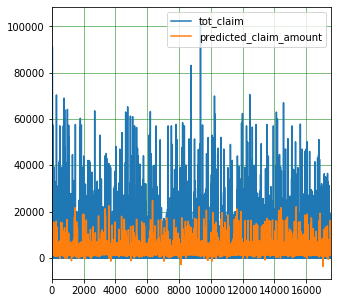

In [103]:
plot_df = Y_test[Y_test.columns[1:3]]
plot_df.plot(kind='line',figsize=(5,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### RANDOM FOREST RESULTS

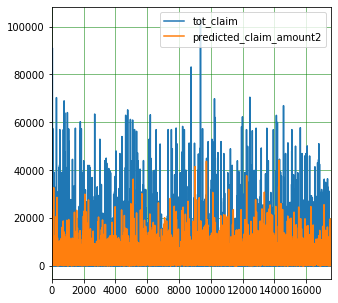

In [105]:
plot_df = Y_test[Y_test.columns[[1,3]]]
plot_df.plot(kind='line',figsize=(5,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()